In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

### Data acknowledgement

In [31]:
data = pd.read_csv("../datasets/movies_dataset.csv", low_memory=False)
print(f"Rows: {data.shape[0]} - Columns: {data.shape[1]}")
print(f"Column names: {data.columns}")
data.head(5)

Rows: 45466 - Columns: 19
Column names: Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'tmdb_id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'title', 'vote_average'],
      dtype='object')


,adult,belongs_to_collection,budget,genres,tmdb_id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average
0,False,toy story collection,30000000,"['animation', 'comedy', 'family']",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,['pixar_animation_studios'],['us'],1995-10-30,373554033.0,81.0,['en'],Toy Story,7.7
1,False,[],65000000,"['adventure', 'fantasy', 'family']",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"['tristar_pictures', 'teitler_film', 'intersco...",['us'],1995-12-15,262797249.0,104.0,"['en', 'fr']",Jumanji,6.9
2,False,grumpy old men collection,0,"['romance', 'comedy']",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"['warner_bros.', 'lancaster_gate']",['us'],1995-12-22,0.0,101.0,['en'],Grumpier Old Men,6.5
3,False,[],16000000,"['comedy', 'drama', 'romance']",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,['twentieth_century_fox_film_corporation'],['us'],1995-12-22,81452156.0,127.0,['en'],Waiting to Exhale,6.1
4,False,father of the bride collection,0,['comedy'],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"['sandollar_productions', 'touchstone_pictures']",['us'],1995-02-10,76578911.0,106.0,['en'],Father of the Bride Part II,5.7


In [32]:
print(f"Numerical statistics\n{data.describe()}", end="\n========\n")
print(f"Null values\n{data.isnull().sum()}", end="\n========\n\n")
print(f"Unique values\n{data.nunique()}", end="\n========\n\n")
print(f"Column types\n{data.dtypes}", end="\n========\n\n")

Numerical statistics
            revenue       runtime  vote_average
count  4.546000e+04  45203.000000  45460.000000
mean   1.120935e+07     94.128199      5.618207
std    6.433225e+07     38.407810      1.924216
min    0.000000e+00      0.000000      0.000000
25%    0.000000e+00     85.000000      5.000000
50%    0.000000e+00     95.000000      6.000000
75%    0.000000e+00    107.000000      6.800000
max    2.787965e+09   1256.000000     10.000000
Null values
adult                      0
belongs_to_collection      0
budget                     0
genres                     0
tmdb_id                    0
imdb_id                   17
original_language         11
original_title             0
overview                 954
popularity                 5
poster_path              386
production_companies       0
production_countries       0
release_date              87
revenue                    6
runtime                  263
spoken_languages           0
title                      6
vote_average 

#### Columns order
##### Necessary
<ol>
<li>genres
<li>release_date
<li>runtime
<li>vote_average
<li>overview
<li>title
</ol>

##### Wanted
<ol>
<li>original_language
<li>revenue
<li>spoken_languages
<li>popularity
<li>production_countries
<li>budget
<li>production_companies
<li>belongs_to_collection
<li>adult
<li>poster_path
</ol>

##### Indexes
<ol>
<li>imdb_id
<li>tmdb_id
</ol>

##### To drop
<ol>
<li>original_title
</ol>

### Data Cleaning
- Null values
- Anomalies
- Values distribution

In [33]:
data.drop(columns="original_title", inplace=True)
data = data[["genres", "release_date", "runtime", "vote_average", "overview", "title",
             "original_language", "revenue", "spoken_languages", "popularity",
             "production_countries", "budget", "production_companies",
             "belongs_to_collection", "adult", "poster_path", "imdb_id", "tmdb_id"]]
print(data.shape)

(45466, 18)


In [34]:
#### Utils functions
def summary(data: pd.DataFrame, column: str):
    print(f"Description:\n{data[column].describe()}", end="\n---\n")
    print(f"Unique values:\n{data[column].nunique()}", end="\n---\n")
    print(f"Top 10 values:\n{pd.DataFrame(data[column].value_counts()).head(10)}", end="\n---\n")
    print(f"Least 5 values:\n{pd.DataFrame(data[column].value_counts()).tail(5)}", end="\n---\n")
    print(f"IS_NULL: {data[column].isnull().sum()}")

def dropna_row(data: pd.DataFrame, column: str):
    data_drop = data.copy()
    data_drop.drop(data_drop.loc[data_drop[column].isnull()].index, inplace=True)
    data_drop.reset_index(drop=True, inplace=True)
    return data_drop.copy()

def plot_values(data: pd.DataFrame, column: str):
    values = data[column].value_counts()
    top_values = values[:10]
    color = ["blue"]*10

    plt.figure(figsize=(8,8))
    plt.title(column)
    plt.bar(x=np.arange(len(top_values)), height=top_values.values, color=color)
    plt.xticks(ticks=np.arange(len(top_values)), labels=top_values.index, rotation=70)
    plt.show()

def plot_hist(x: pd.Series, x_axis="", nbins=25, title=""):
    plt.hist(x, bins=nbins)
    plt.xlabel(x_axis)
    plt.ylabel("#")
    plt.title(title)
    plt.show()

#### Indexes

In [35]:
print("TMDB index")
summary(data, "tmdb_id")

TMDB index
Description:
count      45466
unique     45436
top       141971
freq           3
Name: tmdb_id, dtype: object
---
Unique values:
45436
---
Top 10 values:
        tmdb_id
141971        3
168538        2
25541         2
15028         2
11115         2
84198         2
13209         2
77221         2
152795        2
12600         2
---
Least 5 values:
        tmdb_id
72272         1
1549          1
10171         1
38996         1
461257        1
---
IS_NULL: 0


In [36]:
# dropping movies with the same index
data.drop_duplicates(subset=["tmdb_id"], keep="first", inplace=True)

In [37]:
# IMDB ID
summary(data, "imdb_id")

Description:
count     45419
unique    45417
top           0
freq          3
Name: imdb_id, dtype: object
---
Unique values:
45417
---
Top 10 values:
           imdb_id
0                3
tt0114709        1
tt0167320        1
tt0061658        1
tt1466069        1
tt1756479        1
tt0073014        1
tt1924273        1
tt0045708        1
tt2933544        1
---
Least 5 values:
           imdb_id
tt0062377        1
tt0204504        1
tt0970452        1
tt0033405        1
tt6980792        1
---
IS_NULL: 17


In [38]:
# dropping null id's
data = dropna_row(data, "imdb_id")

#### Genres

In [39]:
summary(data, "genres")

Description:
count         45419
unique         4068
top       ['drama']
freq           4996
Name: genres, dtype: object
---
Unique values:
4068
---
Top 10 values:
                                genres
['drama']                         4996
['comedy']                        3620
['documentary']                   2721
[]                                2437
['drama', 'romance']              1300
['comedy', 'drama']               1133
['horror']                         974
['comedy', 'romance']              930
['comedy', 'drama', 'romance']     593
['drama', 'comedy']                531
---
Least 5 values:
                                                  genres
['adventure', 'drama', 'war', 'history']               1
['science_fiction', 'comedy', 'adventure']             1
['music', 'drama', 'comedy', 'crime', 'romance']       1
['action', 'drama', 'comedy', 'documentary']           1
['family', 'animation', 'romance', 'comedy']           1
---
IS_NULL: 0


In [40]:
# Which genres are in the dataset
data_genres = data['genres']
genres_list = []
for aux_row in data_genres:
    genres_list.extend(aux_row.replace("'", "").strip("[]").split(", "))

available_genres = dict(Counter(genres_list))

# selecting genres with less than 1000 movies 
uncommon_genres = [genre for genre, count in available_genres.items() if count < 1000]

# Dropping movies with uncommon genres or without genres
index_to_drop_by_genres = []
for id_, genres in zip(data_genres.index, data_genres):
    genre = genres.replace("'", "").strip("[]").split(", ")
    has_uncommon = set(genre).intersection(set(uncommon_genres))

    if not genre[0] or has_uncommon:
        index_to_drop_by_genres.append(id_)

data.drop(index_to_drop_by_genres, inplace=True)
data.reset_index(drop=True, inplace=True)

#### Release date
- Remove those rows without release date

In [41]:
summary(data, "release_date")

Description:
count          42186
unique         16685
top       2008-01-01
freq             123
Name: release_date, dtype: object
---
Unique values:
16685
---
Top 10 values:
            release_date
2008-01-01           123
2009-01-01           109
2007-01-01           107
2005-01-01           101
2006-01-01            90
2002-01-01            86
2004-01-01            83
2001-01-01            71
2003-01-01            67
1997-01-01            55
---
Least 5 values:
            release_date
1935-08-09             1
1964-03-24             1
2009-02-22             1
1940-05-25             1
1991-05-13             1
---
IS_NULL: 27


In [42]:
data = dropna_row(data, "release_date")

##### Extracting release year

In [43]:
release_year = [int(date.split("-")[0]) for date in data["release_date"]]
data["release_date"] = release_year
data.rename(columns={"release_date":"release_year"}, inplace=True)

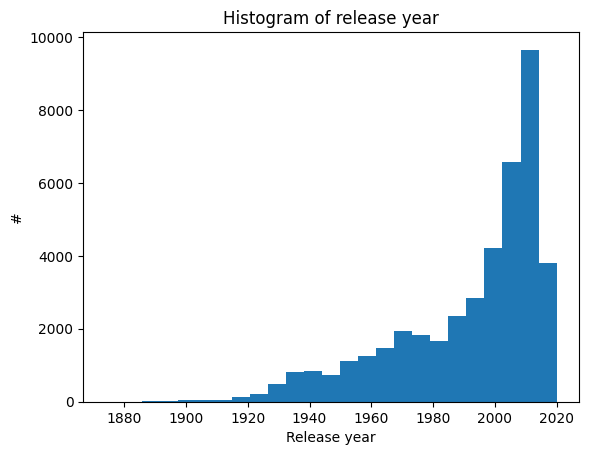

In [44]:
plot_hist(data["release_year"], x_axis="Release year", title="Histogram of release year")

#### Runtime
- Drop null values
- Select a range of time

In [45]:
summary(data, "runtime")

Description:
count    42022.000000
mean        95.516777
std         36.363899
min          0.000000
25%         86.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64
---
Unique values:
340
---
Top 10 values:
       runtime
90.0      2340
100.0     1364
95.0      1340
93.0      1159
0.0       1065
96.0      1044
92.0      1032
94.0      1017
91.0      1002
97.0       977
---
Least 5 values:
       runtime
230.0        1
442.0        1
925.0        1
399.0        1
275.0        1
---
IS_NULL: 164


In [46]:
data = dropna_row(data, "runtime")

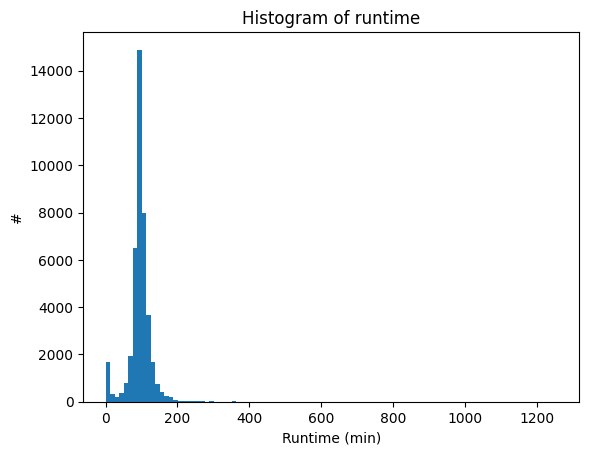

In [47]:
plot_hist(data["runtime"], x_axis="Runtime (min)", title="Histogram of runtime", nbins=100)

##### Selecting limits
Selecting movies with runtime in range [30, 210]
    

In [48]:
def filter_runtime(runtime):
    return 30 <= runtime <= 210

runtime_out_limit = [not(filter_runtime(runtime)) for runtime in data["runtime"]]
runtime_drop = data.loc[runtime_out_limit].index
data.drop(runtime_drop, inplace=True)
data.reset_index(drop=True, inplace=True)

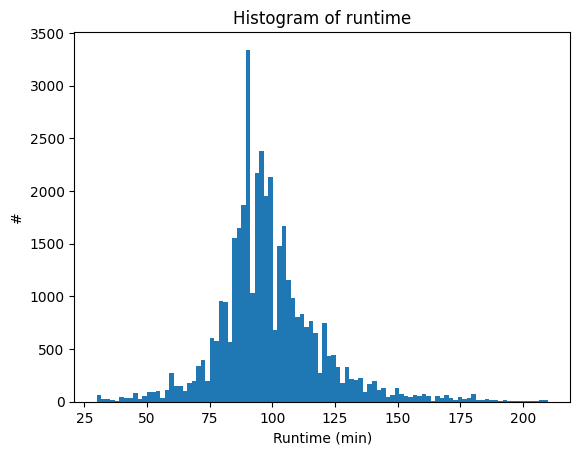

In [49]:
plot_hist(data["runtime"], x_axis="Runtime (min)", title="Histogram of runtime", nbins=100)

#### Vote average
- drop null values
- is 0 != null ???

In [50]:
summary(data, "vote_average")

Description:
count    39672.000000
mean         5.722111
std          1.747760
min          0.000000
25%          5.100000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64
---
Unique values:
91
---
Top 10 values:
     vote_average
6.0          2093
0.0          1885
5.0          1627
7.0          1556
6.5          1547
6.3          1463
5.8          1278
6.4          1269
5.5          1237
6.7          1231
---
Least 5 values:
     vote_average
9.4             3
9.1             2
9.8             1
0.7             1
1.1             1
---
IS_NULL: 0


In [51]:
### Dropping movies with votes = 0
low_rated_index = data.loc[data["vote_average"] == 0,:].index
data.drop(low_rated_index, inplace=True)
data.reset_index(drop=True, inplace=True)

In [52]:
summary(data, "vote_average")

Description:
count    37787.000000
mean         6.007558
std          1.221543
min          0.500000
25%          5.300000
50%          6.100000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64
---
Unique values:
90
---
Top 10 values:
     vote_average
6.0          2093
5.0          1627
7.0          1556
6.5          1547
6.3          1463
5.8          1278
6.4          1269
5.5          1237
6.7          1231
6.8          1203
---
Least 5 values:
     vote_average
9.4             3
9.1             2
9.8             1
0.7             1
1.1             1
---
IS_NULL: 0


#### Overview
- Drop null values

In [53]:
summary(data, "overview")

Description:
count                  37584
unique                 37468
top       No overview found.
freq                      97
Name: overview, dtype: object
---
Unique values:
37468
---
Top 10 values:
                                                    overview
No overview found.                                        97
                                                           3
A few funny little novels about different aspec...         3
No Overview                                                2
When four women move into an old house left by ...         2
The ghost of a samurai's wife takes revenge on ...         2
The Kingdom of the People of the Vale once rule...         2
Wilbur the pig is scared of the end of the seas...         2
Adventurer Allan Quartermain leads an expeditio...         2
With friends like these, who needs enemies? Tha...         2
---
Least 5 values:
                                                    overview
Tokyo! is an anthology of three short films b

In [54]:
# Drop null
empty_overview = data.loc[data["overview"].isnull(),:].index
data.drop(empty_overview, inplace=True)
data.reset_index(drop=True, inplace=True)

In [55]:
# Drop "No overview found.", "No overview"
no_overview = ["No overview found.", "No Overview", " "]
drop_overview = [overview in no_overview for overview in data["overview"]]
drop_overview_id = data.loc[drop_overview,:].index
data.drop(drop_overview_id, inplace=True)
data.reset_index(drop=True, inplace=True)

In [56]:
summary(data, "overview")

Description:
count                                                 37482
unique                                                37465
top       A few funny little novels about different aspe...
freq                                                      3
Name: overview, dtype: object
---
Unique values:
37465
---
Top 10 values:
                                                    overview
A few funny little novels about different aspec...         3
The ghost of a samurai's wife takes revenge on ...         2
Director Michael Apted revisits the same group ...         2
With friends like these, who needs enemies? Tha...         2
Wilbur the pig is scared of the end of the seas...         2
Mary, a writer working on a novel about a love ...         2
A group of travelers, including a monk, stay in...         2
The Kingdom of the People of the Vale once rule...         2
When four women move into an old house left by ...         2
Miser Ebenezer Scrooge is awakened on Christmas...         2
--

In [62]:
# Why some overviews appear more than once???
data.loc[data["overview"] == "A few funny little novels about different aspects of life."]

,genres,release_year,runtime,vote_average,overview,title,original_language,revenue,spoken_languages,popularity,production_countries,budget,production_companies,belongs_to_collection,adult,poster_path,imdb_id,tmdb_id
26630,['comedy'],1990,90.0,5.7,A few funny little novels about different aspe...,The Comics,it,0.0,['it'],2.520134,['it'],0,[],the comics collection,False,/7bd4nNtxNMlsJc2ysEJMJ01HY36.jpg,tt0099293,43646
26631,['comedy'],1991,91.0,5.5,A few funny little novels about different aspe...,The Comics 2,it,0.0,['it'],1.999079,['it'],0,[],the comics collection,False,/fIhoGGxL8flbYQPTt7F1xeSxEKh.jpg,tt0103991,43648
26632,['comedy'],1994,102.0,5.0,A few funny little novels about different aspe...,The New Comics,it,0.0,['it'],1.254781,['it'],0,[],the comics collection,False,/rbcrzKi4qdQ0D5vEokTQCOlpvRS.jpg,tt0159611,43649


In [79]:
# It looks like the movies with the same overview are from the same collection
overview_counts = pd.DataFrame(data["overview"].value_counts())
repeated_overviews = overview_counts.loc[overview_counts["overview"] > 1].index
data.loc[data["overview"].isin(repeated_overviews), ["release_year","overview", "title", "belongs_to_collection","vote_average"]].sort_values("overview")

,release_year,overview,title,belongs_to_collection,vote_average
26632,1994,A few funny little novels about different aspe...,The New Comics,the comics collection,5.0
26631,1991,A few funny little novels about different aspe...,The Comics 2,the comics collection,5.5
26630,1990,A few funny little novels about different aspe...,The Comics,the comics collection,5.7
25047,1951,"A group of travelers, including a monk, stay i...",The Red Inn,[],6.6
30105,2007,"A group of travelers, including a monk, stay i...",The Red Inn,[],5.0
28618,1975,A wooden boy Buratino tries to find his place ...,The Adventures of Buratino,[],5.4
36560,1959,A wooden boy Buratino tries to find his place ...,The Adventures of Buratino,[],4.4
4417,1937,Adventurer Allan Quartermain leads an expediti...,King Solomon's Mines,[],4.8
8082,1950,Adventurer Allan Quartermain leads an expediti...,King Solomon's Mines,allan quatermain (1950 series),6.3
30460,2015,"Alien pods come to Earth and, naturally, start...",Parasyte: Part 2,parasyte collection,5.9


The movies with the same overview are from the same collection, or looks like reboots, so all of them will be kept

#### Title
- Drop null/ampty values

In [80]:
summary(data, "title")

Description:
count          37482
unique         35042
top       Cinderella
freq               7
Name: title, dtype: object
---
Unique values:
35042
---
Top 10 values:
                      title
Cinderella                7
Hamlet                    7
Alice in Wonderland       7
Beauty and the Beast      7
Countdown                 6
Macbeth                   6
Mother                    6
The Hunters               6
Treasure Island           6
A Christmas Carol         6
---
Least 5 values:
                            title
The Gunfight at Dodge City      1
A World Without Thieves         1
Killer Babes                    1
Mystery Team                    1
Caged Heat 3000                 1
---
IS_NULL: 0


In [81]:
data.loc[data["title"].isin(["", " ", "-"])]

,genres,release_year,runtime,vote_average,overview,title,original_language,revenue,spoken_languages,popularity,production_countries,budget,production_companies,belongs_to_collection,adult,poster_path,imdb_id,tmdb_id


In [85]:
# Looking at the top and the last movies sorted by title, check special caracters
titles = data["title"].sort_values()
print(titles.head(20))
print(titles.tail(20))

17485                 !Women Art Revolution
27239                   #1 Cheerleader Camp
31047                               #Horror
21396                          #chicagoGirl
24986                   $1,000 on the Black
30209                    $100,000 for Ringo
14922                              $5 a Day
31074    $50K and a Call Girl: A Love Story
14070                                 $9.99
20438                            $ellebrity
22758                                   '71
31378                                   'D'
29805                           'Gator Bait
33557       'Master Harold'... and the Boys
13280              'Neath the Arizona Skies
15201                               'R Xmas
26845                       'Twas the Night
2814                         'night, Mother
13223                  (500) Days of Summer
22098                             (A)Sexual
Name: title, dtype: object
2207                      ¡Three Amigos!
31835              ¡Vivan las Antipodas!
5154       

All titles seems to be ok